In [5]:
!gdown 1n783d_zJnVQen1VSQazUlbfpRkcPZHcJ
!gdown 12_LOBGk_Oqab06x2gBvQ7QLs5T-taNjY

Downloading...
From: https://drive.google.com/uc?id=1n783d_zJnVQen1VSQazUlbfpRkcPZHcJ
To: /content/user_data.csv
100% 43.6k/43.6k [00:00<00:00, 61.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=12_LOBGk_Oqab06x2gBvQ7QLs5T-taNjY
To: /content/logs.csv
100% 132k/132k [00:00<00:00, 66.9MB/s]


## Логи пользователей (мини-проект)

**Импорт набора данных с пользовательскими данными из csv-файла в рабочем каталоге**

In [4]:
import pandas as pd


user_data = pd.read_csv('user_data.csv', sep=',')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


** Импорт набора данных с логами из csv-файла**

In [6]:
logs = pd.read_csv('logs.csv', sep=',')

logs[:]

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


**Проверка имен столбцов**

In [7]:
logs.columns

Index(['client', 'success', 'platform', 'time'], dtype='object')

**Описательная статистика**

In [8]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


**Печать краткой сводки по фрейму данных**

In [9]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


**Проверка типов данных столбцов**

In [10]:
logs.dtypes

,0
client,int64
success,bool
platform,object
time,int64


**Проверка значений NaN (не числа) в наборе данных**

In [11]:
# True -- NaN value, False -- not a NaN value
user_data.isna()

,client,premium,age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2949,False,False,False
2950,False,False,False
2951,False,False,False
2952,False,False,False


**Подсчет значений NaN в наборе данных**

In [12]:
user_data.isna().sum()
# у нас нет значений Nan в нашем наборе данных user_data

,0
client,0
premium,0
age,0


**Обнаружение уникальных значений столбца платформы**

In [13]:
logs.platform \
    .nunique()

3

**Поиск наиболее активных клиентов (на основе параметра "количество успешных операций")**

In [16]:
client_lst = logs.query('success == True') \
    .groupby(['client'], as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success', 'client'], ascending=[False, True]) \
    .query('success == success.max()') \
    .client \
    .to_list()

# список идентификаторов самых активных клиентов в виде строки
', '.join([str(client) for client in client_lst])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

**Платформа с наибольшим количеством успешных операций**

In [21]:
logs.query('success == True') \
    .groupby(['platform'], as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending=False) \
    .head(1)

,platform,success
1,phone,2019


**Печать краткой сводки по фрейму данных**

In [22]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


**Проверка пяти первых строк набора данных**

In [23]:
user_data.head(5)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


**Какая платформа наиболее популярна среди премиум-клиентов?**

In [24]:
user_data.query('premium == True') \
    .merge(logs, on='client') \
    .platform \
    .value_counts() \
    .head(1)

,count
platform,
phone,246


**Визуализируйте распределение клиентов по возрасту в зависимости от типа клиентов (премиум или обычные).**

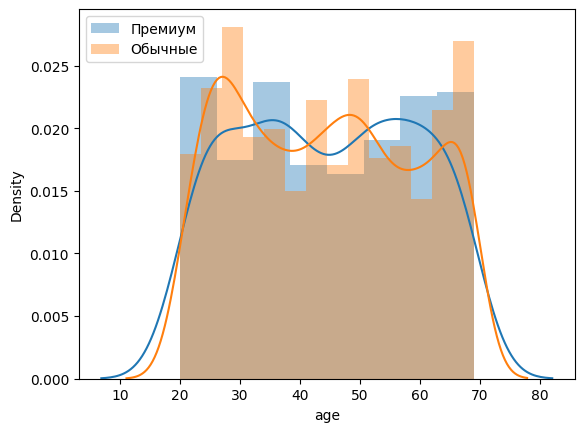

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

premium_clients = user_data.query('premium == True').merge(logs, on='client').age
regular_clients = user_data.query('premium == False').merge(logs, on='client').age

ax = sns.distplot(premium_clients, label = 'Премиум')
ay = sns.distplot(regular_clients, label = 'Обычные')
plt.legend()
plt.show()

<Axes: xlabel='age', ylabel='Density'>

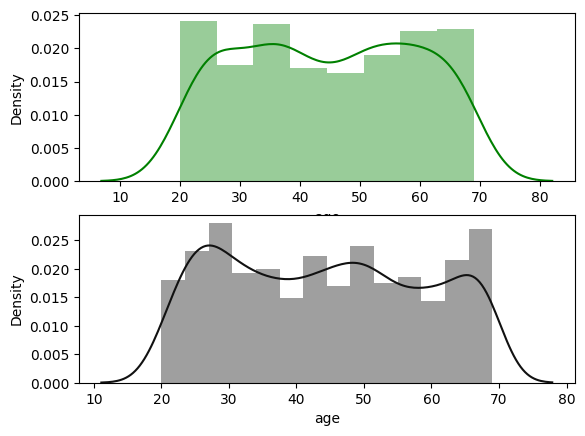

In [28]:
# добавление данных из ячейки выше и изменение цвета
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(premium_clients, ax=ax[0], color='green')
sns.distplot(regular_clients, ax=ax[1], color='#111111')

**Hаспределение количества успешных операций по сравнению с количеством клиентов.**

In [33]:
# x – successful operations
# y – number of clients
data = user_data.merge(logs, on='client')

data.groupby(['client'], as_index=False) \
    .agg({'success': 'sum'})\
    .success.value_counts()

,count
success,
1,2051
0,850
2,42
41,9
40,1
3,1


**Визуализируйте количество успешных операций, выполненных с компьютеров, в зависимости от возраста клиентов.**

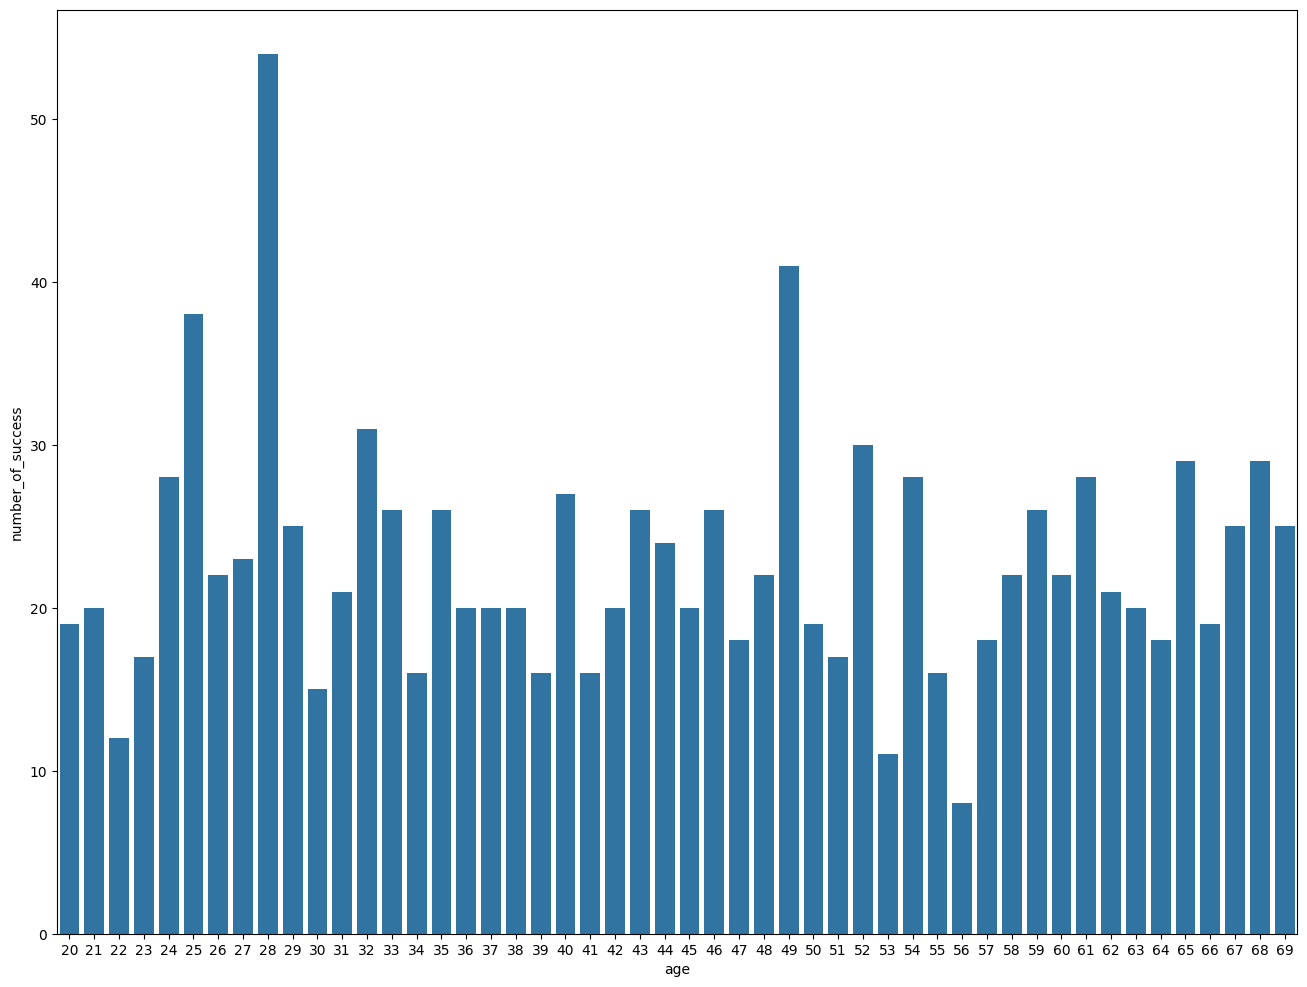

In [37]:
success_from_pc = data.query('platform == "computer"')


plt.figure(figsize=(16, 12))
ax = sns.countplot(x='age', data=success_from_pc)
ax.set(xlabel='age', ylabel='number_of_success')
plt.show()

<Axes: xlabel='age', ylabel='success'>

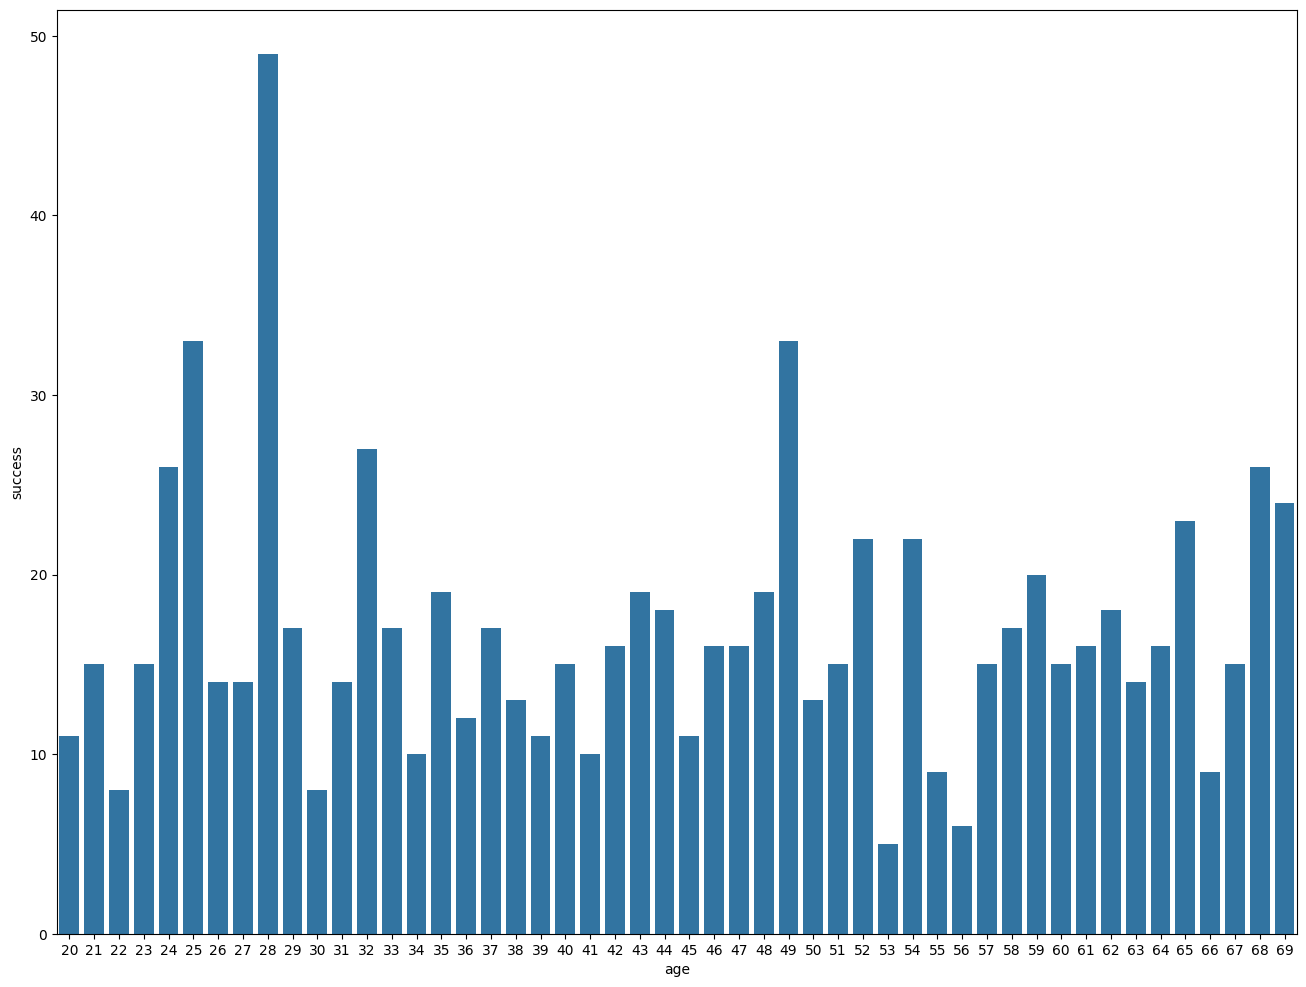

In [38]:
# альтернативное решение с использованием метода .barplot()
success_from_pc = data.query('platform == "computer"') \
    .groupby('age', as_index=False) \
    .agg({'success': 'sum'})

plt.figure(figsize=(16, 12))
sns.barplot(x=success_from_pc.age, y=success_from_pc.success)